<a href="https://colab.research.google.com/github/Sayan3sarkar/Diabetes_Detection_using_Gradient_Boosting_Classifier/blob/master/Diabetes_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Diabetes Dectection using Gradient Boosting</h1>

<h3>Import  required libraries</h3>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<h3>Load Dataset</h3>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)
root_dir = '/content/gdrive/My Drive/'
base_dir = root_dir +'Colab Notebooks/Datasets'
base_dir

Mounted at /content/gdrive


'/content/gdrive/My Drive/Colab Notebooks/Datasets'

In [3]:
%cd /content/gdrive/My\ Drive/Colab\ Notebooks/Datasets

/content/gdrive/My Drive/Colab Notebooks/Datasets


In [4]:
#Verifiying present working directory
!pwd

/content/gdrive/My Drive/Colab Notebooks/Datasets


In [5]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<h3>Exploring the data</h3>

In [0]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [0]:
df.shape

(768, 9)

In [0]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<h3> Checking for null values</h3>

In [0]:
df.isna().head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [0]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<h3> We conclude from above cell that there are no missing values </h3>

In [0]:
df.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

<h3> We can conclude that 500 people dont have diabetes whereas 268 people have diabetes</h3>

<h3>Visualization</h3>

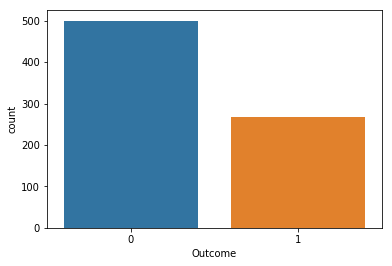

In [0]:
import seaborn as sns

sns.countplot(df['Outcome'], label = 'Count')

<h3>Splitting data into training and test set</h3>

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[:,df.columns != 'Outcome'], df['Outcome'], stratify = df['Outcome'], random_state = 66)

<h2> Using Gradient Boosting Classifier</h2>

In [0]:
from sklearn.ensemble import GradientBoostingClassifier

In [0]:
clf = GradientBoostingClassifier(random_state = 0).fit(X_train, y_train)

<h3> Prediction on test set</h3>

In [0]:
pred = clf.predict(X_test)
pred

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0])

<h3> Performance Evaluation </h3>

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
conf = confusion_matrix(y_test, pred)

In [0]:
conf

array([[107,  18],
       [ 22,  45]])

<h3> Confusion Matrix gives a test set accuracy of (107+45)/192= 79.16% accuracy</h3>

In [0]:
clf.score(X_train, y_train) #Accuracy using basic score predictor on train set

0.9166666666666666

In [0]:
clf.score(X_test, y_test) #Accuracy using basic score predictor on test set

0.7916666666666666

<h3> Test set accuracy using basic score prediction is similar to result obtained from confusion matrix. But training set is over-fitted with 91.66% accuracy</h3>

<h3> So we fine tune parameters to reduce over-fitting in training set</h3>

In [0]:
clf = GradientBoostingClassifier(random_state = 0, max_depth = 1).fit(X_train, y_train)

<h3> Prediction on test set</h3>

In [0]:
pred = clf.predict(X_test)
pred

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0])

<h3> Performance Evaluation </h3>

In [0]:
confusion_matrix(y_test, pred)

array([[108,  17],
       [ 25,  42]])

<h3> Confusion Matrix gives a test set accuracy of (108+42)/192= 78.12% accuracy. Thus, test-set accuracy is reduced in accordance to confusion matrix</h3>

In [0]:
clf.score(X_train, y_train) #Accuracy using basic score predictor on train set

0.8038194444444444

In [0]:
clf.score(X_test, y_test) #Accuracy using basic score predictor on test set

0.78125

<h3> Test set accuracy using basic score prediction is similar to result obtained from confusion matrix. But in this case,training set accuracy is reduced to 80.38%. Thus, we have prevented over-fitting but at the expense of reduced test set accuracy</h3>

<h3> Checking feature importances and visualizing them</h3>

In [0]:
clf.feature_importances_

array([0.01983843, 0.57943018, 0.00607206, 0.00361876, 0.00624007,
       0.24868314, 0.05818316, 0.0779342 ])

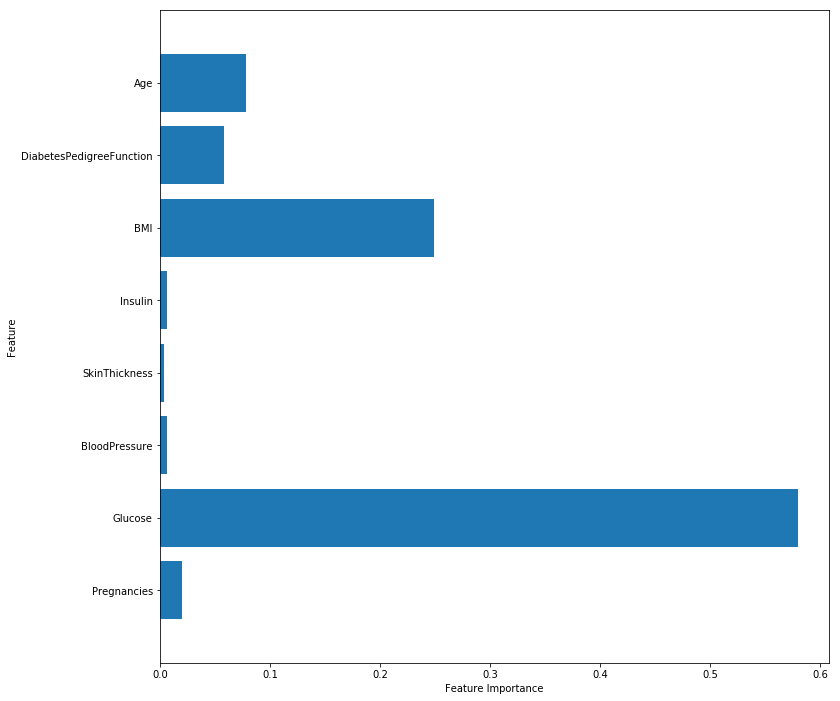

In [0]:
diabetes_features = [x for i,x in enumerate(df.columns) if i<8]
def plot_feature_importances(model):
  plt.figure(figsize = (12,12))
  n_features = 8
  plt.barh(range(n_features), model.feature_importances_, align = 'center')
  plt.yticks(np.arange(n_features), diabetes_features)
  plt.xlabel('Feature Importance')
  plt.ylabel('Feature')
  plt.ylim(-1, n_features)
  
plot_feature_importances(clf)
plt.savefig('feature_importance')

<h3>From above cell we can clearly conclude that 'Glucose' is the most important feature in order to predict Diabetes in a patient</h3>